In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# IRIS Daten laden

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Train Test split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Entscheidungsbaum-Algorithmus spezifizieren

Maximamle Baumtiefe ist drei (max_depth=3)

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)


# Entscheidungsbaum trainieren

In [5]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Klassifikationsgenauigkeit ausrechnen

In [6]:
clf.score(X_test, y_test)

0.9833333333333333

# Klassen der Testdaten vorhersagen

In [7]:
y_predict = clf.predict(X_test)

# Klassifikationsreport ausgeben

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



# Entscheidungsbaum ausgeben

[Text(418.5, 951.3000000000001, 'petal length (cm) <= 2.45\ngini = 0.665\nsamples = 90\nvalue = [27, 31, 32]\nclass = virginica'),
 Text(279.0, 679.5, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]\nclass = setosa'),
 Text(558.0, 679.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 63\nvalue = [0, 31, 32]\nclass = virginica'),
 Text(279.0, 407.70000000000005, 'petal length (cm) <= 5.35\ngini = 0.208\nsamples = 34\nvalue = [0, 30, 4]\nclass = versicolor'),
 Text(139.5, 135.89999999999998, 'gini = 0.117\nsamples = 32\nvalue = [0, 30, 2]\nclass = versicolor'),
 Text(418.5, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(837.0, 407.70000000000005, 'petal length (cm) <= 4.85\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]\nclass = virginica'),
 Text(697.5, 135.89999999999998, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(976.5, 135.89999999999998, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]\nclass = virginica')]

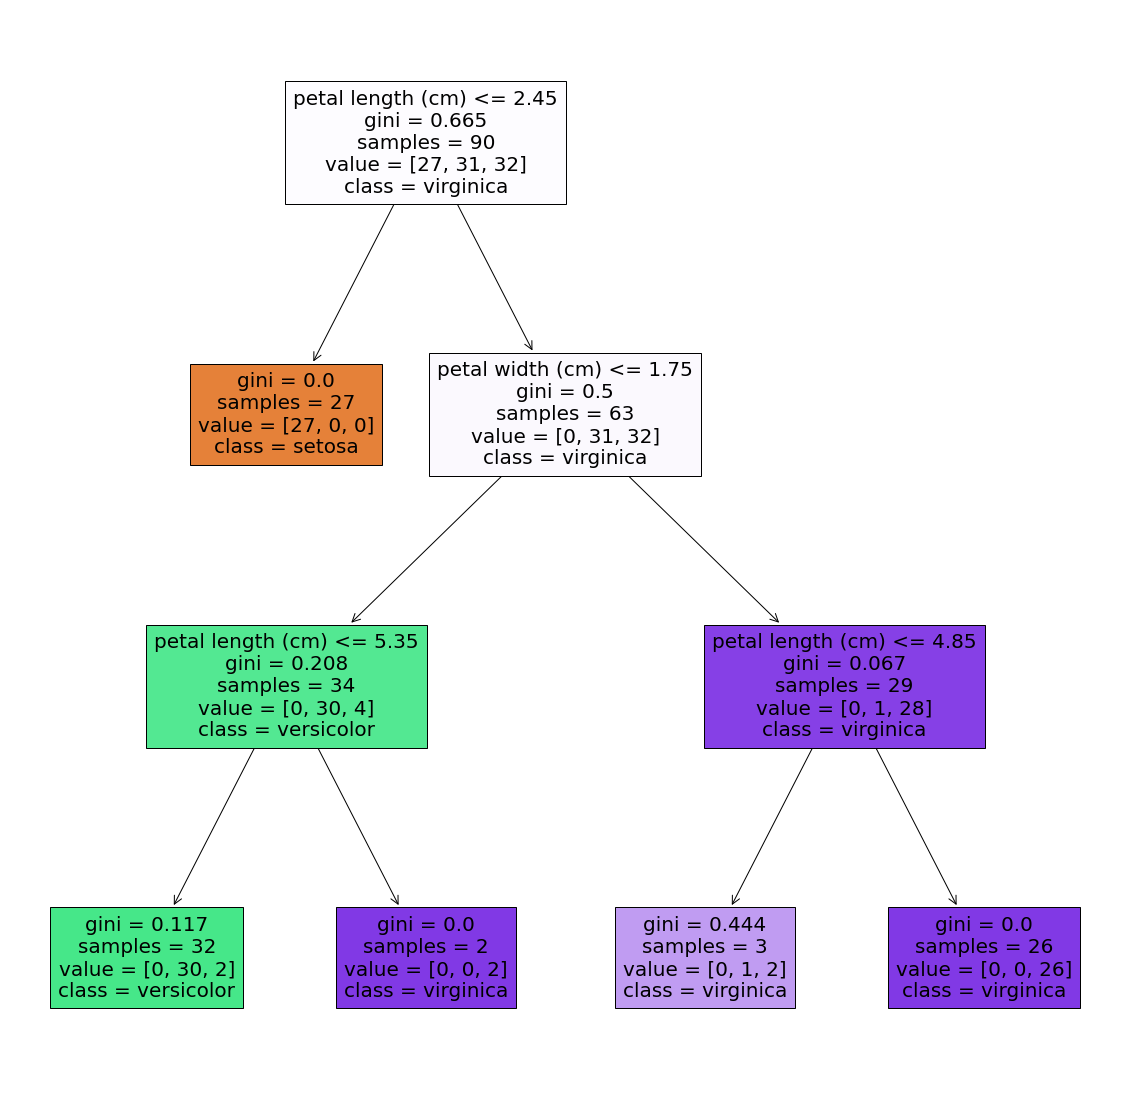

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(clf,feature_names=iris.feature_names, class_names=iris.target_names, filled = True)

# Python Packet dtreeviz installieren

In [10]:
!pip install dtreeviz

  Created wheel for dtreeviz: filename=dtreeviz-0.8.2-py3-none-any.whl size=24501 sha256=1f6605e42bb22ab228fc14b70e4764e3dff6bf87d9b772988c10aaa543757ff7
  Stored in directory: /root/.cache/pip/wheels/2f/a4/af/948fc126ebbf6b01b01fe02c311b326e35bb115a3c6d4bdc90
Successfully built dtreeviz
ERROR: mxnet 1.6.0 has requirement graphviz<0.9.0,>=0.8.1, but you'll have graphviz 0.14 which is incompatible.
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# Python Packet dtreeviz importiern

In [11]:
from dtreeviz.trees import dtreeviz

# Mit dtreeviz Entscheidungsbaum ausgeben

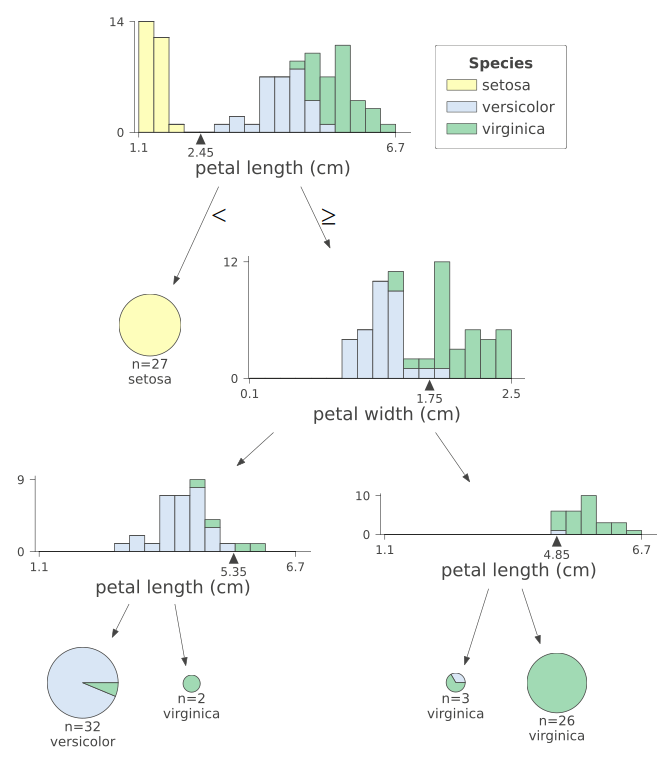

In [12]:
viz = dtreeviz(
    clf,
    X_train, 
    y_train,
    target_name="Species",
    feature_names=iris.feature_names,
    class_names=list(iris.target_names),
    scale=2
) 
viz

# Wichtigkeit der Attribute

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


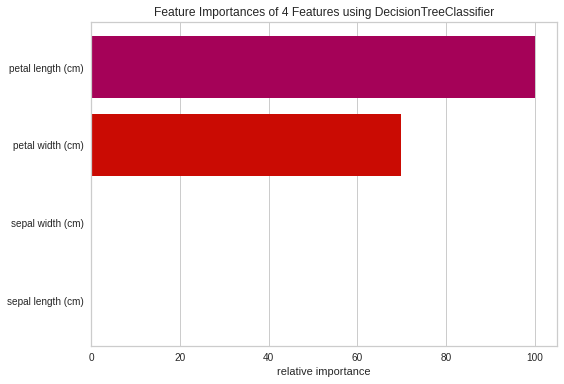

In [13]:
from yellowbrick.model_selection import FeatureImportances
fi_viz = FeatureImportances(clf, labels=iris.feature_names)
fi_viz.fit(X_test, y_test)
fi_viz.show()

# Confusion Matrix ausgeben

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


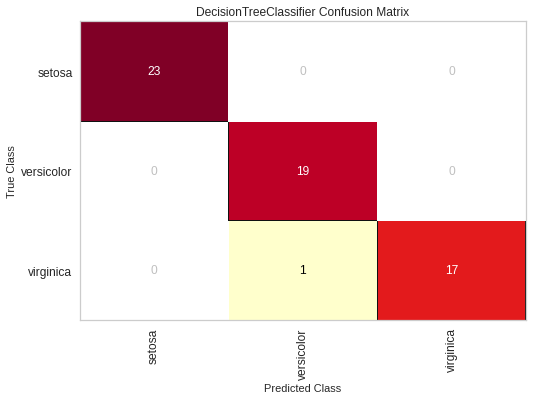

In [14]:
from yellowbrick.classifier import ConfusionMatrix
iris_cm = ConfusionMatrix(
    clf, classes=iris.target_names,
    label_encoder={0: 'setosa', 1: 'versicolor', 2: 'virginica'}
)
iris_cm.score(X_test, y_test)
iris_cm.show()


# Wahrscheinlichkeit der Klassen vorhersagen

In [15]:
y_probas = clf.predict_proba(X_test)

# Python Packet scikit-plot installieren

In [16]:
!pip install scikit-plot

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# ROC Kurve ausgeben

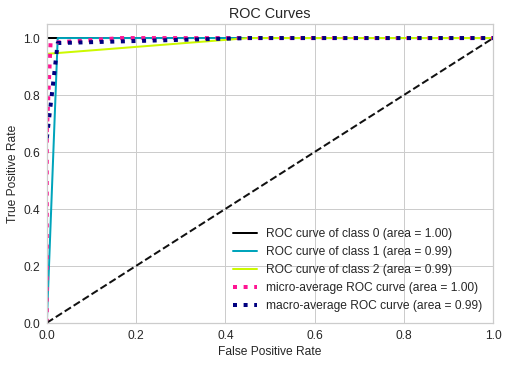

In [17]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

# Precision-Recall Kurve ausgeben

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


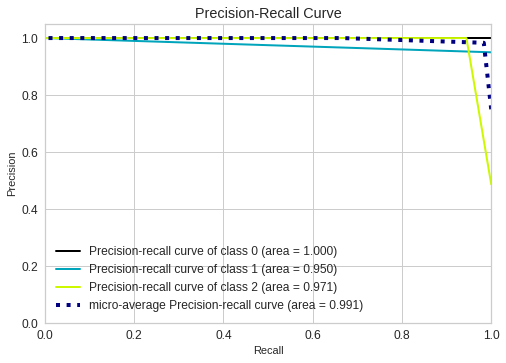

In [18]:
skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.show()

# Lernkurve ausgeben

Einfluss der Größe der Traningsdaten auf die Güte

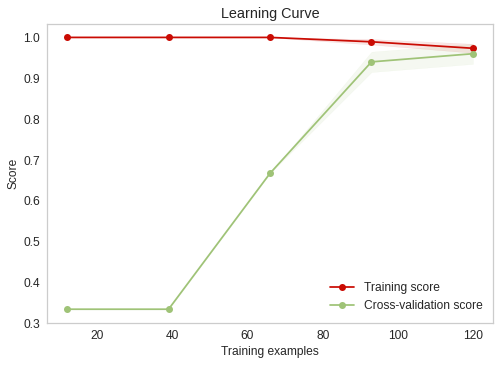

In [19]:
skplt.estimators.plot_learning_curve(clf, X, y)
plt.show()